# Outlier detection and removal using z-score and standard deviation in python pandas

**Problem:** Import a dataset, explore it and detect the outliers using Std deviation and Z-score.

In [11]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

**We are going to use heights dataset from kaggle.com. Dataset has heights and weights both but I have removed weights to make it simple**

In [12]:
df = pd.read_csv("C:\\Users\\asus\\Desktop\\DS_Rep\\ML\\FeatureEngineering\\2_outliers_z_score\\heights.csv")
df.sample(5)

,gender,height
4447,Male,68.124692
2993,Male,68.111097
3373,Male,71.160905
3118,Male,71.834466
8617,Female,61.979324


CLearly the height is in inches so change the column name accordingly for better understanding.

In [14]:
df.rename(columns = {'height' : 'height_in_inches'}, inplace = True)
df.head()

,gender,height_in_inches
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [15]:
df.shape

(10000, 2)

In [16]:
df.describe()

,height_in_inches
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


Now we plot histogram in order to have a better (visual) understanding of our dataset, i.e. whether it follows normal distribution (bell curve).

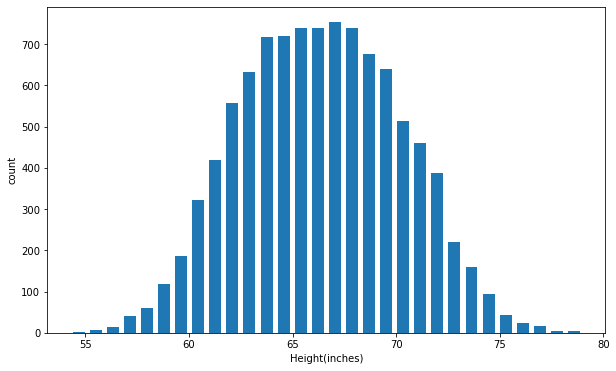

In [22]:
plt.hist(df.height_in_inches, bins = 30, rwidth = 0.7)
plt.xlabel("Height(inches)")
plt.ylabel('count')
plt.show()

Refer this awesome article fundamental understanding on normal distribution, bell curve and standard deviation. https://www.mathsisfun.com/data/standard-normal-distribution.html

The Normal Distribution has:

+ mean = median = mode
+ symmetry about the center
+ 50% of values less than the mean and 50% greater than the mean

**Plotting bell curve along with histogram for our dataset**

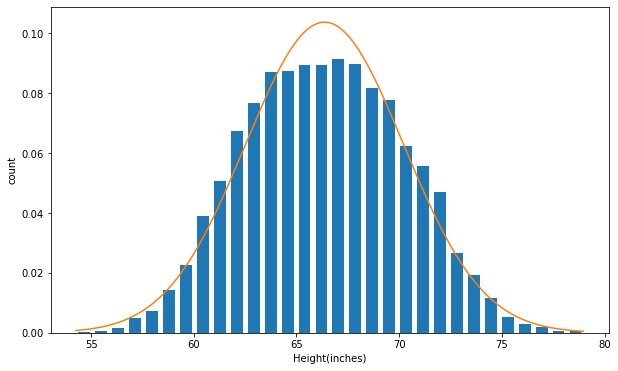

In [28]:
from scipy.stats import norm
import numpy as np

plt.hist(df.height_in_inches, bins = 30, rwidth = 0.7, density = True)
plt.xlabel("Height(inches)")
plt.ylabel('count')

rng = np.arange(df.height_in_inches.min(), df.height_in_inches.max(),0.1)
plt.plot(rng, norm.pdf(rng,df.height_in_inches.mean(), df.height_in_inches.std()))

we can see the data(histogram) nearly following the bell curve. So for the normal distribution we can detect outliers based on the fact that 99.7% of the data lies in b/w -3 Std. Dev (sigma) to +3 Std.Dev(sigma) from the mean. So our accepted range of data points can be  {mean-3*sigma to mean+3*sigma} which will cover 99.7% of the dataset. Anything excluding this range can be considered as outlier. 

In [30]:
df.height_in_inches.mean()

66.3675597548656

In [31]:
df.height_in_inches.std()

3.847528120795573

Here the mean is 66.37 and standard deviation is 3.84. 

<h3 style='color:blue'>(1) Outlier detection and removal using 3 standard deviation</h3>

One of the ways we can remove outliers is remove any data points that are beyond **3 standard deviation** from mean. Which means we can come up with following upper and lower bounds

In [33]:
upper_limit = df.height_in_inches.mean() + 3*df.height_in_inches.std()
upper_limit

77.91014411725232

In [34]:
lower_limit = df.height_in_inches.mean() -3*df.height_in_inches.std()
lower_limit

54.824975392478876

Here are the outliers that are beyond 3 std dev from mean

In [37]:
df[(df.height_in_inches>upper_limit) | (df.height_in_inches<lower_limit)]

,gender,height_in_inches
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Above the heights on higher end is **78 inch** which is around **6 ft 6 inch**. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if we remove those data points.
Similarly on lower end it is **54 inch** which is around **4 ft 6 inch**. While this could also a legitimate height, but we don't find many people having this height so it is safe to consider both of these cases as outliers

**Now removing these outliers and generating new dataframe**

In [39]:
df_no_outlier_std_dev = df[(df.height_in_inches<upper_limit) & (df.height_in_inches>lower_limit)]
df_no_outlier_std_dev.head()

,gender,height_in_inches
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [40]:
df_no_outlier_std_dev.shape

(9993, 2)

In [41]:
df.shape

(10000, 2)

In [42]:
df.shape[0] - df_no_outlier_std_dev.shape[0]

7

Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993) 

<h3 style='color:blue'>(2) Outlier detection and removal using Z Score</h3>

**Z score is another way to achieve the same thing that we did above in part (1)**

**Z score indicates how many standard deviation away a data point is.**

For example in our case mean is 66.37 and standard deviation is 3.84. 

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

<h3 style='color:purple'>Calculate the Z Score</h3>

<img align='left' height="400" width="300" src="zscore.png" />

Add a new column in the df containing the Z scores of all the data points respectively.

In [43]:
df['zscore'] = ( df.height_in_inches - df.height_in_inches.mean() ) / df.height_in_inches.std()
df.head(5)

,gender,height_in_inches,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [44]:
(73.84-66.37)/3.84

1.9453124999999998

**Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away**

In [45]:
df[df['zscore']>3]

,gender,height_in_inches,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [46]:
df[df['zscore']<-3]

,gender,height_in_inches,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


Here is the list of all outliers 

In [47]:
df[(df.zscore<-3) | (df.zscore>3)]

,gender,height_in_inches,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


<h3 style='color:purple'>Removing the outliers and producing new dataframe using Z score now</h3>

In [48]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,gender,height_in_inches,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [49]:
df_no_outliers.shape

(9993, 3)

In [50]:
df.shape

(10000, 3)

In [51]:
df.shape[0] - df_no_outliers.shape[0]

7

Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993) 

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe. 

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result